### Datenanalyse

Dieses Dokument dient zur Einarbeitung in den Datensatz. Ziel ist es ein Verständnis der einzelnen Attribute zu erlangen und ein Gefühl für deren Zusammenspiel zu gewinnen. Weiterhin sollen fehlerhafte Daten identifiziert werden.

**Vorbereitung: Import benötigter Bibliotheken & Einlesen der Daten**

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [ ]:
DATASET_DIR = Path(r"C:\Users\Robert\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
bureau_balance = pd.read_csv(DATASET_DIR / "bureau_balance.csv")
credit_card_balance = pd.read_csv(DATASET_DIR / "credit_card_balance.csv")
installments_payments = pd.read_csv(DATASET_DIR / "installments_payments.csv")
pcb = pd.read_csv(DATASET_DIR / "POS_CASH_balance.csv")
previous_application = pd.read_csv(DATASET_DIR / "previous_application.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

**Beschreibungen der Attribute untergliedert nach den gegebenen CSV-Dateien**

In [ ]:
description.loc[description['Table']=="application_{train|test}.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="bureau.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="bureau_balance.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="POS_CASH_balance.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="credit_card_balance.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="previous_application.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="installments_payments.csv", "Row":"Special"]

## Untersuchung Application-Train & Application-Test

**Erstellung von Subklassen**

* payback = Kreditnehmer die ihren Kredit zurückzahlten
* default = Kreditnehmer die ihren Kredit nicht zurückzahlten
* nums = numerische Daten
* cats = kategorische Daten

In [4]:
num_heads = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
cat_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [5]:
payback = app_train[app_train["TARGET"] == 0]
default = app_train[app_train["TARGET"] == 1]
nums = app_train[num_heads]
cats = app_train[cat_heads]

**Funktion zum zeichnen eines Kreisdiagramms**

In [55]:
# Function to draw a Piechart
def draw_piechart(arguments):
    
    fig, ax = plt.subplots(1,len(arguments))
    
    try:
    # Handle multiple plots
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            a.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
    
    # Handle single plot           
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
        
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    plt.show()

## Untersuchung der Kreditnehmer - Payback vs. Default

**Verhältnis Payback zu Default im Datensatz**

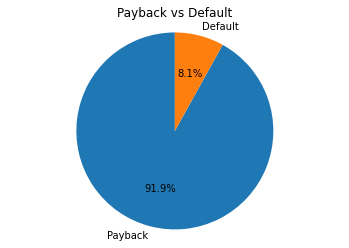

In [56]:
pb = len(payback.index)
df = len(default.index)
n = pb + df

labels = "Payback", "Default"
sizes = [pb/n,df/n]
title = "Payback vs Default"

arguments = [(labels, sizes, title)]

draw_piechart(arguments)

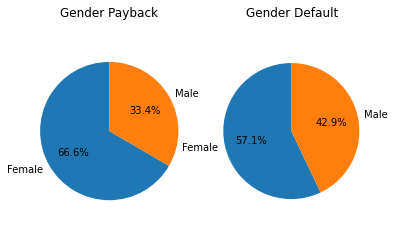

In [58]:
F,M,other = payback["CODE_GENDER"].value_counts()
n = F+M+other

labels1 = "Female", "Male"
sizes1 = [F/n,M/n]
title1 = "Gender Payback"

F,M = default["CODE_GENDER"].value_counts()
n = F+M

labels2 = "Female", "Male"
sizes2 = [F/n,M/n]
title2 = "Gender Default"

arguments = [(labels1, sizes1, title1),(labels2, sizes2, title2)]

draw_piechart(arguments)